In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import string
print(string.punctuation)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('/content/Mental Health Dataset.csv')
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [4]:
df.shape

(10392, 3)

In [5]:
df['intensity'].value_counts()

,count
intensity,
0,4375
-1,4112
-2,1155
1,750


In [6]:
df['predicted'].value_counts()

,count
predicted,
neutral,4375
negative,4112
very negative,1155
positive,750


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
posts,1
predicted,0
intensity,0


In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


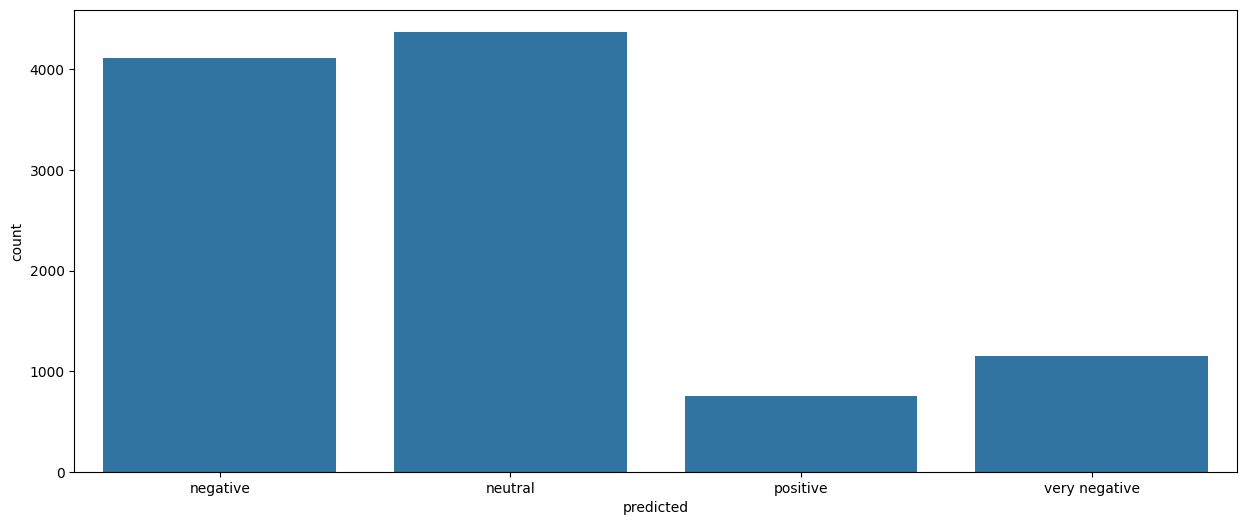

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='predicted')
plt.show()

In [12]:
df_new = df.copy()
df_new

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0
...,...,...,...
10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,the doctor advise we he could not remove the a...,neutral,0
10390,my 66 year old father have been through so muc...,neutral,0


In [13]:
df_new['posts'][0]

'I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by t

In [14]:
def preprocess(text):
  text = text.lower()
  text = ''.join([i for i in text if i not in string.punctuation])
  text = ' '.join([word for word in text.split(' ') if word not in set(stopwords.words('english'))])
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
  return text.strip()

In [15]:
df_new['posts'] = df_new['posts'].apply(lambda x: preprocess(x))
df_new

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc 2013 07 17 gmo l...,neutral,0
...,...,...,...
10387,hey everyone 25 year old male work eat pretty ...,negative,-1
10388,surgery stage 1 colon cancer 1 year ago cea le...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,66 year old father much past year really need ...,neutral,0


In [17]:
df_new['posts']

,posts
0,know parent child syndrome hear child high ris...
1,heart know future promise article regardless h...
2,mylefibrosis turn leukemia want stem cell tran...
3,one health group subject wayne dyer leukemia c...
4,gmos link leukemia http nsnbc 2013 07 17 gmo l...
...,...
10387,hey everyone 25 year old male work eat pretty ...
10388,surgery stage 1 colon cancer 1 year ago cea le...
10389,doctor advise could remove abnormal polyp chri...
10390,66 year old father much past year really need ...


In [20]:
# split data into train & test
x_train, x_test, y_train, y_test = train_test_split(df_new['posts'], df_new['intensity'], test_size = 0.25, random_state = 42)

In [26]:
# we are creating a pipeline, 1st we transform the data by converting text to vector and then we to apply classification model.
models = Pipeline([('BOW', CountVectorizer(ngram_range=(1,1), binary=True)), ('BNB',BernoulliNB())])
models.fit(x_train, y_train)

Pipeline(steps=[('BOW', CountVectorizer(binary=True)), ('BNB', BernoulliNB())])

In [27]:
y_train_pred = models.predict(x_train)
y_test_pred = models.predict(x_test)

In [30]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.612601052226357
Test Accuracy:  0.560816012317167


In [45]:
models = Pipeline([('BOW', CountVectorizer(ngram_range=(1,1))), ('RF',RandomForestClassifier())])
models.fit(x_train, y_train)

Pipeline(steps=[('BOW', CountVectorizer()), ('RF', RandomForestClassifier())])

In [46]:
y_train_pred = models.predict(x_train)
y_test_pred = models.predict(x_test)

In [47]:
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9994867188502502
Test Accuracy:  0.670130869899923


In [52]:
models.predict(["name amber married matt 3 small child find today husband cancer spot neck sorry know kind ask dr typical man thing laugh loud anyhow also golf ball size tumor brain stem sorry hard write anyhow think spot brain stem cancer biopsy spot neck call family physician let know lump grow bit spot year also experience nose bleed migraine think cause spot brain stem also ct scan find spot brain stem anyhow tell go test mother day want worry town sister baby look experimental drug know call know 6 shot 1 inject site tumor anyhow also treat spot brain stem cause problem know pretty much ramble use support get want lose husband want baby lose daddy thank read"])

array([-1])